# Travelling Salesman Problem
The [Travelling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem) is a very well known NP-hard combinatorial optimization problem, which asks: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?"

For this problem, the chromosome has been selected to be the set of cities. Therefore, chromosome sequence is $[3,1,4,0,2]$ then the order of cities travelled is $3\rightarrow 1\rightarrow 4\rightarrow 0\rightarrow 2\rightarrow 3$.

### Genetic Algorithm Process
The genetic algorithm iteratively solves this problem using fitness evaluation, parent selection, crossover, and mutation. Below is an explanation of these steps with examples:

#### 1. Fitness Calculation
The fitness function evaluates the quality of each route. Routes with shorter distances have higher fitness values. Fitness is calculated as:
$$fitness = e^{DNA_{size} * 2 / total\_distance}$$
For example:
- Population: $[[0, 2, 1, 3], [1, 3, 0, 2], [2, 0, 3, 1]]$
- City Positions: $[[0, 0], [1, 2], [2, 0], [3, 3]]$ (coordinates for cities 0, 1, 2, 3) 
- Total Distances: $[7.211, 8.485, 7.616]$
- Fitness: $[0.00365, 0.00274, 0.00339]$

#### 2. Parent Selection
Parents are selected based on fitness using roulette wheel sampling. Individuals with higher fitness have a greater chance of being selected.
For instance, given fitness values $[0.00365, 0.00274, 0.00339]$, the selected population might be:
$[[0, 2, 1, 3], [2, 0, 3, 1], [0, 2, 1, 3]]$

#### 3. Crossover
During crossover, a subset of genes (cities) from one parent is combined with the genes from another parent to produce offspring, ensuring no duplicate cities. For example:
- Parent 1: $[0, 2, 1, 3]$
- Parent 2: $[2, 0, 3, 1]$
- Random Mask: $[True, False, True, False]$
- Offspring: $[2, 3, 0, 1]$

#### 4. Mutation
Mutation introduces diversity by swapping two cities within a route with a small probability. For example:
- Before Mutation: $[2, 3, 0, 1]$
- After Mutation: $[2, 1, 0, 3]$

#### Evolution
The population evolves over generations by selecting parents, applying crossover, and mutating offspring. This process improves the solutions iteratively.

### Example
Starting Population: $[[0, 2, 1, 3], [1, 3, 0, 2], [2, 0, 3, 1]]$
Evolved Population: $[[0, 3, 2, 1], [2, 1, 0, 3], [1, 0, 2, 3]]$


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from tsp import GA

N_CITIES = 20  # DNA size
CROSS_RATE = 0.1
MUTATE_RATE = 0.02
POP_SIZE = 500
N_GENERATIONS = 350

class GA(object):
    def __init__(self, DNA_size, cross_rate, mutation_rate, pop_size):
        self.DNA_size = DNA_size
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.pop_size = pop_size

        self.pop = np.vstack([np.random.permutation(DNA_size) for _ in range(pop_size)])

    def translateDNA(self, DNA, city_position):     # get cities' coord in order
        line_x = np.empty_like(DNA, dtype=np.float64)
        line_y = np.empty_like(DNA, dtype=np.float64)
        for i, d in enumerate(DNA):
            city_coord = city_position[d]
            line_x[i, :] = city_coord[:, 0]
            line_y[i, :] = city_coord[:, 1]
        return line_x, line_y

    def get_fitness(self, line_x, line_y):
        total_distance = np.empty((line_x.shape[0],), dtype=np.float64)
        for i, (xs, ys) in enumerate(zip(line_x, line_y)):
            total_distance[i] = np.sum(np.sqrt(np.square(np.diff(xs)) + np.square(np.diff(ys))))
        fitness = np.exp(self.DNA_size * 2 / total_distance)
        return fitness, total_distance

    def select(self, fitness):
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=fitness / fitness.sum())
        return self.pop[idx]

    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)                        # select another individual from pop
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool_)    # choose crossover points
            keep_city = parent[~cross_points]                                       # find the city number
            swap_city = pop[i_, np.isin(pop[i_].ravel(), keep_city, invert=True)]
            parent[:] = np.concatenate((keep_city, swap_city))
        return parent

    def mutate(self, child):
        for point in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                swap_point = np.random.randint(0, self.DNA_size)
                swapA, swapB = child[point], child[swap_point]
                child[point], child[swap_point] = swapB, swapA
        return child

    def evolve(self, fitness):
        pop = self.select(fitness)
        pop_copy = pop.copy()
        for parent in pop:  # for every parent
            child = self.crossover(parent, pop_copy)
            child = self.mutate(child)
            parent[:] = child
        self.pop = pop

class TravelSalesPerson(object):
    def __init__(self, n_cities):
        self.city_position = np.random.rand(n_cities, 2)
        plt.ion()
        self.iter = 0

    def plotting(self, lx, ly, total_d, save=False):
        plt.cla()
        plt.scatter(self.city_position[:, 0].T, self.city_position[:, 1].T, s=100, c='k')
        plt.plot(lx.T, ly.T, 'r-')
        plt.text(-0.05, -0.05, "Total distance=%.2f" % total_d, fontdict={'size': 20, 'color': 'red'})
        plt.xlim((-0.1, 1.1))
        plt.ylim((-0.1, 1.1))
        if save: plt.savefig('Images/travelling_salesman/travelling_salesman_{:03d}'.format(self.iter))
        if self.iter%50==0: plt.show()
        self.iter += 1

In [18]:
env = TravelSalesPerson(N_CITIES)

Gen: 0 | best fit: 1325.86


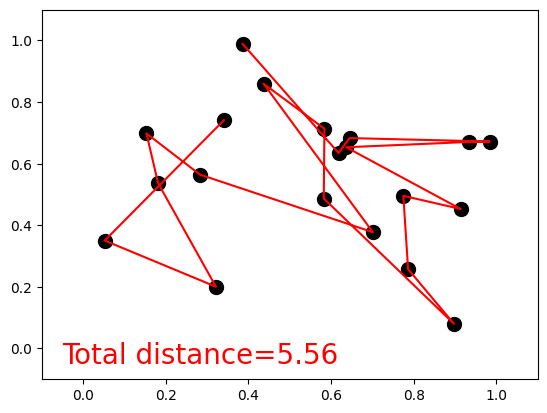

Gen: 50 | best fit: 48837.22


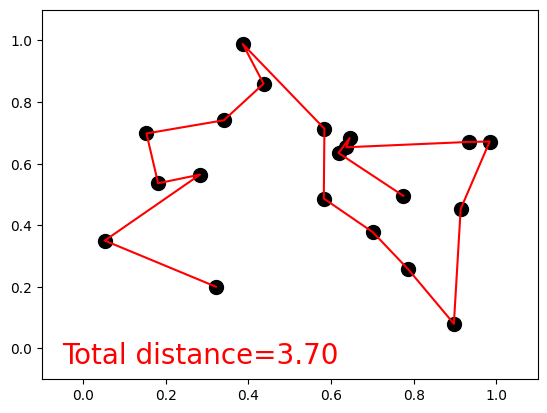

Gen: 100 | best fit: 87105.15


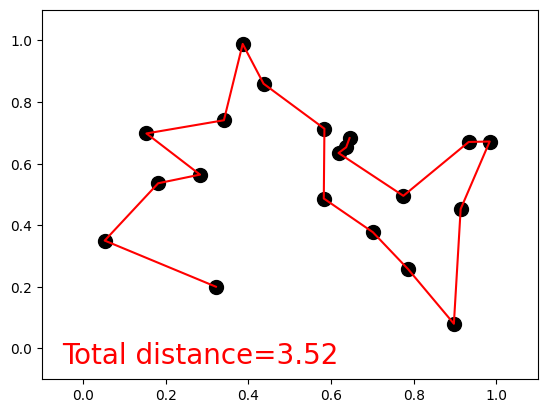

Gen: 150 | best fit: 82021.52


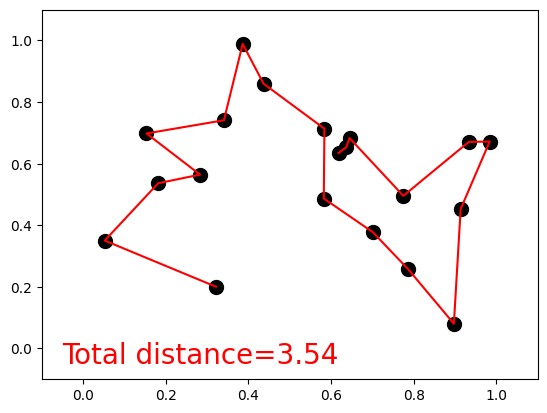

Gen: 200 | best fit: 87105.15


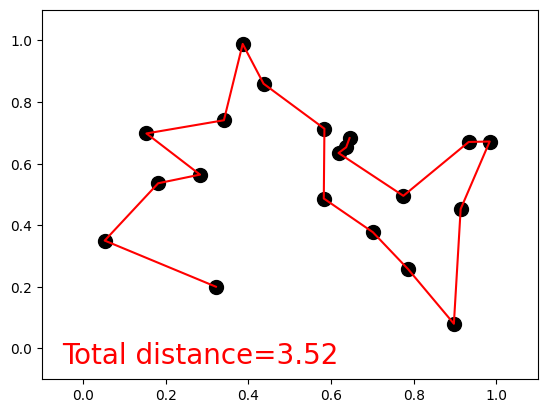

Gen: 250 | best fit: 87105.15


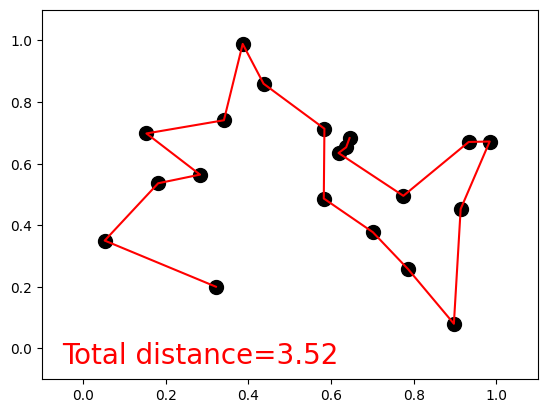

Gen: 300 | best fit: 87105.15


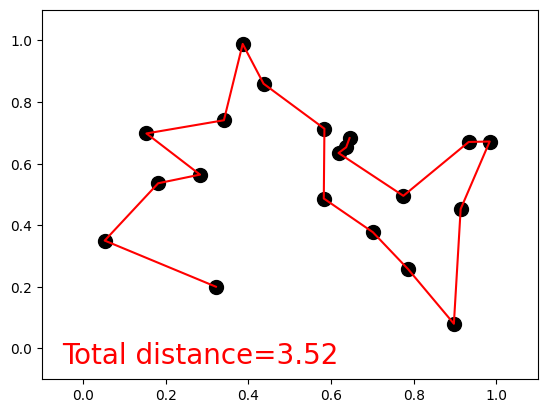

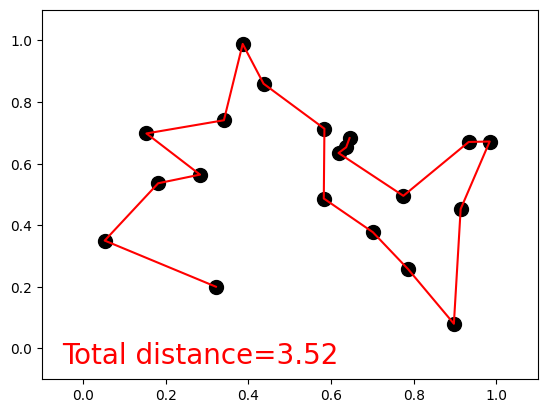

In [19]:
n_runs = 20
fitness_max = np.zeros((n_runs, N_GENERATIONS))
for i in range(n_runs):
    ga = GA(DNA_size=N_CITIES, cross_rate=CROSS_RATE, mutation_rate=MUTATE_RATE, pop_size=POP_SIZE)
    for generation in range(N_GENERATIONS):
        lx, ly = ga.translateDNA(ga.pop, env.city_position)
        fitness, total_distance = ga.get_fitness(lx, ly)
        ga.evolve(fitness)
        best_idx = np.argmax(fitness)
        fitness_max[i, generation] = total_distance[best_idx]
        if i==0:
            if generation%50==0: print('Gen:', generation, '| best fit: %.2f' % fitness[best_idx],)
            env.plotting(lx[best_idx], ly[best_idx], total_distance[best_idx])

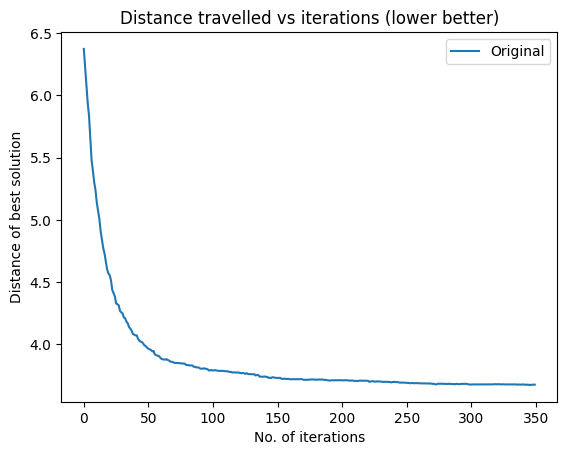

In [20]:
plt.plot(np.average(fitness_max, axis=0), label='Original')
plt.title('Distance travelled vs iterations (lower better)')
plt.xlabel('No. of iterations')
plt.ylabel('Distance of best solution')
plt.legend()